# Importing required libraries::

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import time

# Reading csv file of iris data set::
  This file is taken from the link provided in the project1 pdf containing 150 rows

In [3]:
iris_data = pd.read_csv("./data/iris.csv")
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Phase exploring data analysis(EDA)::

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Just doing some checks on datatypes of columns.

In [ ]:
iris_data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

- Checking if the rows contains any null values. It doesn't contain any null values otherwise we should go for adjusting the values.

# Plotting histogram of the features used to predict the variety::

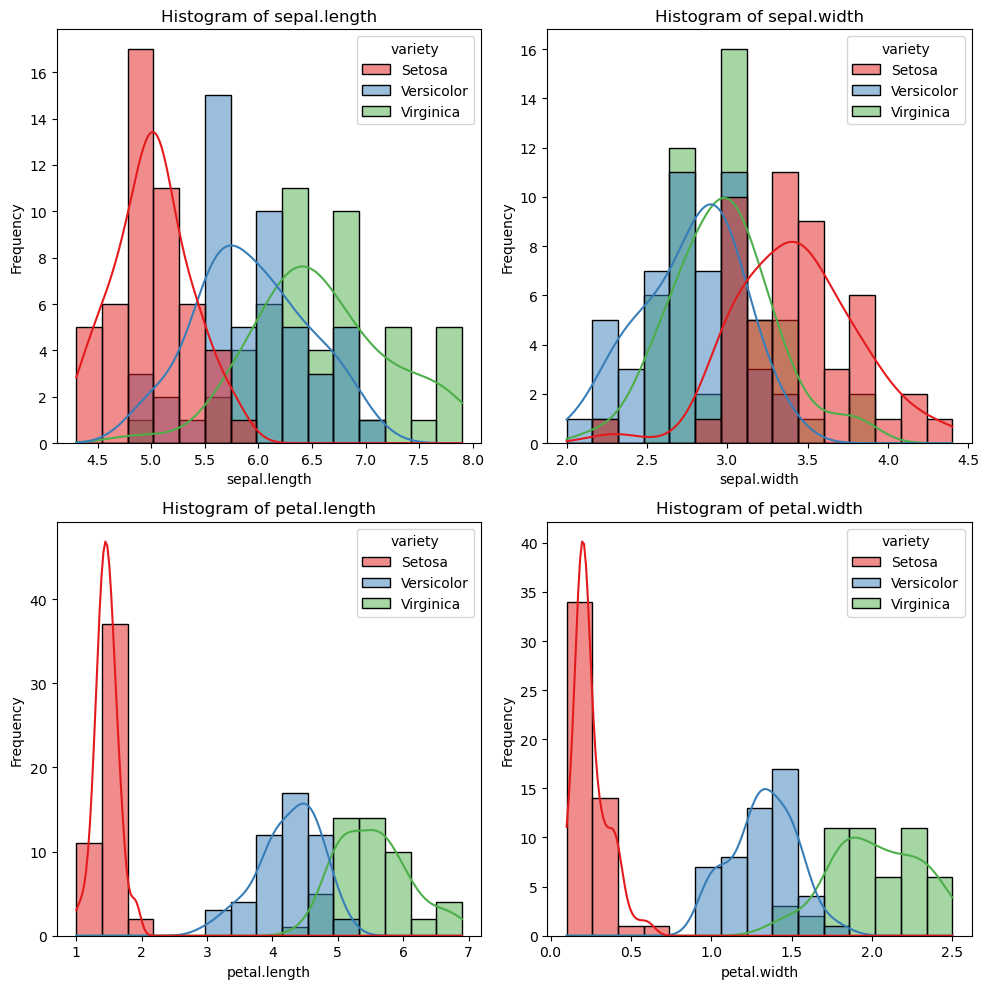

In [ ]:
plt.figure(figsize=(10, 10))
for index, feature in enumerate(["sepal.length","sepal.width","petal.length","petal.width"]):
    plt.subplot(2, 2, index+1)
    sns.histplot(data=iris_data, x=feature, hue='variety', kde=True, palette='Set1', bins=15)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis of histogram:
- From the histogram of sepal length, we can see that there is a huge overlapping of Virginica, Versicolor, and Setosa.
- From the histogram of sepal width, we can feel even more crossing-overs and overlaps with each other.
The histogram of petal length as well as petal width shows distinct character for Setosa whereas there is only some overlapping between Versicolor and Virginica.
- we can see ranges, where different species lie on sepal lengths like Setosa lies on 4.7 to 5.0, versicolor lies on 5.5 to 7 and Virginica lies on 6.3 to 6.5, similarly, we can also observe the ranges for other features.
- The distribution for petal width and length can distinct Setosa more accurately which lies on 1 to 2.1 length and 0.2 to 0.7 width while only small overlapping is seen for versicolor and virginca for both petal length and width.
- Sepal width in general is so overlapped, we can even ignore the column for the training our model.


## Encoding the label:::
 The target or label is catagorical which need to be changed to numeric data, as we have three variety, those will be changed to 0, 1, 2.

In [ ]:
label_encoder = LabelEncoder()
iris_data['target'] = label_encoder.fit_transform(iris_data['variety'])
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


## Splitting the dataset

In [ ]:
iris_data_dropped_variety = iris_data.drop('variety', axis=1)
x = iris_data_dropped_variety.drop('target', axis=1)
y = iris_data['target']

y.head()

- Splitting data into 60 , 20, 20 ratio

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

- Splitting data into 80 , 10, 10 ratio

In [ ]:
X_train_1, X_temp_1, Y_train_1, Y_temp_1 = train_test_split(x, y, test_size=0.2, random_state=42)
X_val_1, X_test_1, Y_val_1, Y_test_1 = train_test_split(X_temp_1, Y_temp_1, test_size=0.5, random_state=42)

In [ ]:
print(len(iris_data),len(X_train), len(X_val),len(X_test))
print(len(iris_data),len(X_train_1), len(X_val_1),len(X_test_1))

150 90 30 30
150 120 15 15


# The dataframe has been divided into two dataset:
- First of all the data is seperated to features and label denoted by X and Y
- X_train, X_val, X_test for ratio 60, 20, 20
- X_train_1, X_val_1, X_test_1 for ratio 80, 10, 10

## Grid search and print the best params with best result.

In [ ]:
# Grid search function for finding best scores and params.
def findBestScoreAndParams(model, params, X_train, Y_train, dataSetType='60 percent ratio'):
    grid_search_cv = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2)    
    grid_search_cv.fit(X_train, Y_train)
    print(f"Best Hyperparameters for model {dataSetType} train dataset::")
    print(grid_search_cv.best_params_)
    print(f"Best Score for model {dataSetType} train dataset::", round(grid_search_cv.best_score_,3),'\n')

## Using grid search for the randomforest model to find the best hyperparameters

In [ ]:
params_for_rf = {
    'n_estimators': [20, 50, 70],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

RfModel = RandomForestClassifier(random_state=42)

- 5-fold cross validation for 60 20 20 data ratio for RF

In [ ]:
scores_for_ratio_60 = cross_val_score(RfModel, X_train, Y_train, cv=5)
scores_for_ratio_60

array([1.        , 0.72222222, 0.94444444, 1.        , 0.94444444])

- 5-fold cross validation for 80 10 10 data ratio for RF

In [ ]:
scores_for_ratio_80 = cross_val_score(RfModel, X_train_1, Y_train_1, cv=5)
scores_for_ratio_80

array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.95833333])

In [ ]:
findBestScoreAndParams(RfModel, params_for_rf, X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for model 60 percent ratio train dataset::
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score for model 60 percent ratio train dataset:: 0.933 



In [ ]:
findBestScoreAndParams(RfModel, params_for_rf, X_train_1, Y_train_1, '80 percent ratio')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for model 80 percent ratio train dataset::
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score for model 80 percent ratio train dataset:: 0.95 



## Using grid search for the logistic regression model to find the best hyperparameters

In [ ]:
params_for_lr = {
    'penalty': [None,'l2'], 
    'solver': ['saga', 'lbfgs','sag','newton-cg'],
}

LrModel = LogisticRegression(random_state=42)


- 5-fold cross validation for 60 20 20 data ratio for LR

In [ ]:
scores_for_ratio_60 = cross_val_score(LrModel, X_train, Y_train, cv=5)
scores_for_ratio_60

C:\Users\aacic\anaconda3\envs\iris_dataset_assignment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aacic\anaconda3\envs\iris_dataset_assignment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([1.        , 0.77777778, 1.        , 1.        , 0.94444444])

- 5-fold cross validation for 80 10 10 data ratio

In [ ]:
scores_for_ratio_80 = cross_val_score(LrModel, X_train_1, Y_train_1, cv=5)
scores_for_ratio_80

C:\Users\aacic\anaconda3\envs\iris_dataset_assignment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aacic\anaconda3\envs\iris_dataset_assignment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([1.        , 1.        , 0.875     , 1.        , 0.95833333])

In [ ]:
findBestScoreAndParams(LrModel, params_for_lr, X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters for model 60 percent ratio train dataset::
{'penalty': None, 'solver': 'lbfgs'}
Best Score for model 60 percent ratio train dataset:: 0.967 



In [ ]:
findBestScoreAndParams(LrModel, params_for_lr, X_train_1, Y_train_1, '80 percent ratio')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters for model 80 percent ratio train dataset::
{'penalty': 'l2', 'solver': 'saga'}
Best Score for model 80 percent ratio train dataset:: 0.975 



C:\Users\aacic\anaconda3\envs\iris_dataset_assignment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Using grid search for the gradient boosting model to find the best hyperparameters

In [ ]:
params_for_gb = {
    'n_estimators': [20, 50, 70],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

GbModel = GradientBoostingClassifier(random_state=42)

- 5-fold cross validation for 60 20 20 data ratio for gb

In [ ]:
scores_for_ratio_60 = cross_val_score(GbModel, X_train, Y_train, cv=5)
scores_for_ratio_60

array([0.88888889, 0.72222222, 1.        , 0.94444444, 0.94444444])

- 5-fold cross validation for 80 10 10 data ratio for gb

In [ ]:
scores_for_ratio_80 = cross_val_score(GbModel, X_train_1, Y_train_1, cv=5)
scores_for_ratio_80

array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.95833333])

In [ ]:
findBestScoreAndParams(GbModel, params_for_gb, X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for model 60 percent ratio train dataset::
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
Best Score for model 60 percent ratio train dataset:: 0.933 



In [ ]:
findBestScoreAndParams(GbModel, params_for_gb, X_train_1, Y_train_1, '80 percent ratio')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for model 80 percent ratio train dataset::
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best Score for model 80 percent ratio train dataset:: 0.95 



## Writing helper functions for printing the validation and test results

In [ ]:
def printValidationResult(model, x_val, y_val):
    validation_start_time = time.time()
    validation_predict = model.predict(x_val)
    execution_time = time.time() - validation_start_time
    validation_data_accuracy = accuracy_score(y_val, validation_predict)
    validation_data_precision = precision_score(y_val, validation_predict, average='weighted')
    validation_data_recall = recall_score(y_val, validation_predict, average='weighted')

    print("Results for second dataset {}".format(model))
    print(f"Time taken for validation predict execution of {execution_time} seconds")
    print("Validation data Accuracy:", round(validation_data_accuracy,3))
    print("Validation data Precision:", round(validation_data_precision,3))
    print("Validation data Recall:", round(validation_data_recall,3))
    
def printTestResult(model, x_test, y_test):
    test_start_time = time.time()
    test_predict = model.predict(x_test)
    execution_time = time.time() - test_start_time
    test_data_accuracy = accuracy_score(y_test, test_predict)
    test_data_precision = precision_score(y_test, test_predict, average='weighted')
    test_data_recall = recall_score(y_test, test_predict, average='weighted')

    print(f"Time taken for test predict execution {execution_time} seconds")
    print("Test data Accuracy:", round(test_data_accuracy,3))
    print("Test data Precision:", round(test_data_precision,3))
    print("Test data Recall:", round(test_data_recall,3),'\n')

## Fitting the model with the respective best hyperparameters found and doing the validation and test for the dataset(60,20,20)

In [ ]:
rf = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50)
lr = LogisticRegression(penalty= None, solver = 'lbfgs')
gb = GradientBoostingClassifier(max_depth = None, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 20)

for model in [rf, lr, gb]:
    model.fit(X_train, Y_train)
    printValidationResult(model, X_val, Y_val)
    printTestResult(model, X_test, Y_test)

Results for second dataset RandomForestClassifier(min_samples_split=5, n_estimators=50)
Time taken for validation predict execution of 0.013541936874389648 seconds
Validation data Accuracy: 1.0
Validation data Precision: 1.0
Validation data Recall: 1.0
Time taken for test predict execution 0.007158041000366211 seconds
Test data Accuracy: 0.967
Test data Precision: 0.969
Test data Recall: 0.967 

Results for second dataset LogisticRegression(penalty=None)
Time taken for validation predict execution of 0.0017535686492919922 seconds
Validation data Accuracy: 1.0
Validation data Precision: 1.0
Validation data Recall: 1.0
Time taken for test predict execution 0.002418994903564453 seconds
Test data Accuracy: 0.967
Test data Precision: 0.969
Test data Recall: 0.967 

Results for second dataset GradientBoostingClassifier(max_depth=None, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=20)
Time taken for validation predict execution of 0.0009987354278564453 seco

## Fitting the model with the respective best hyperparameters found and doing the validation and test for the dataset(80,10,10)

In [ ]:
rf1 = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50)
lr1 = LogisticRegression(penalty= 'l2', solver = 'saga')
gb1 = GradientBoostingClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 20)

for model in [rf1, lr1, gb1]:
    model.fit(X_train_1, Y_train_1)
    printValidationResult(model, X_val_1, Y_val_1)
    printTestResult(model, X_test_1, Y_test_1)

Results for second dataset RandomForestClassifier(min_samples_split=5, n_estimators=50)
Time taken for validation predict execution of 0.016841888427734375 seconds
Validation data Accuracy: 1.0
Validation data Precision: 1.0
Validation data Recall: 1.0
Time taken for test predict execution 0.015305280685424805 seconds
Test data Accuracy: 1.0
Test data Precision: 1.0
Test data Recall: 1.0 

Results for second dataset LogisticRegression(solver='saga')
Time taken for validation predict execution of 0.0009961128234863281 seconds
Validation data Accuracy: 1.0
Validation data Precision: 1.0
Validation data Recall: 1.0
Time taken for test predict execution 0.0 seconds
Test data Accuracy: 1.0
Test data Precision: 1.0
Test data Recall: 1.0 

Results for second dataset GradientBoostingClassifier(max_depth=None, n_estimators=20)
Time taken for validation predict execution of 0.0 seconds
Validation data Accuracy: 1.0
Validation data Precision: 1.0
Validation data Recall: 1.0
Time taken for test pr

C:\Users\aacic\anaconda3\envs\iris_dataset_assignment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Observation on Accuracy after predict
For the training data set of ratio 60 20 20 with grid search, the random forest model and gradient boosting model show same 0.9333 best scores with hyperparameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} and {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} respectively whilst the Logistic regression has 0.967 best score with hyper-params {'penalty': None, 'solver': 'lbfgs'}
In this case, we can see logistic regression has the best score than the other two.

Similarly, For the training data set of ratio 80 10 10 with grid search, the random forest model and gradient boosting model show same 0.95 best scores with hyperparameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} and {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20} respectively whilst the logistic regression has 0.975 best score with hyperparams {'penalty': 'l2', 'solver': 'saga'}. In this case, we can see logistic regression has again better score than the other two for the increased training dataset.

We can see that increasing the training data set has also increased the score of each model. On further fitting those models with the validation and test data using the best hyper-params, the Accuracy is 1.0, Precision is 1.0, Recall is 1.0 for validation data and Accuracy is 0.967, Precision is 0.969, Recall is 0.967 for test data for all model whilst the score increased to Accuracy is 1, Precision is 1, Recall is 1  for test data when taken from ratio 80 10 10 for all three models.

The dataset is only 150 so the scores are showing at 100% but on increasing the rows it may decrease. The best part of the observation was when modeling in a large training dataset the accuracy increased when I thought it would increase. i.e. for 80 percent of the iris data frame.